<a href="https://www.kaggle.com/code/surajthakur21/simple-to-extreme-langgraph-workflows-without-llm?scriptVersionId=262154514" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
pip install langgraph

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 919.2 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.3/153.3 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.5/447.5 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.5/216.5 kB 6.8 MB/s eta 0:00:00
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.66
    Uninstalling langchain-core-0.3.66:
      Successfully uninstalled langchain-core-0.3.66
Note: you may need to restart the kernel to use updated packages.


In [3]:
from typing import TypedDict
from typing_extensions import Annotated
import operator

class State(TypedDict):
    step: Annotated[int, operator.add]  # increments get summed automatically
    branch: str


In [4]:
def node1(state: State):
    print("Node 1: Start workflow")
    return {"step": 1, "branch": state["branch"]}

def node2(state: State):
    print("Node 2: Checking condition for branching")
    branch = "A" if state["step"] % 2 == 0 else "B"
    return {"step": 1, "branch": branch}

def node3(state: State):
    print("Node 3A: Branch A")
    return {"step": 1}

def node4(state: State):
    print("Node 3B: Branch B")
    return {"step": 1}

def node5(state: State):
    print("Node 4: Merge after branch")
    return {"step": 1}

def node6(state: State):
    print("Node 5: Start loop preparation")
    return {"step": 1}

def node7(state: State):
    print(f"Node 6: Loop iteration {state['step']}")
    return {"step": 1}

def node8(state: State):
    print("Node 7: Loop exit condition check")
    return {}  # no step increment, just decision point

def node9(state: State):
    print("Node 8: After loop")
    return {"step": 1}

def node10(state: State):
    print("Node 9: Parallel task 1")
    return {"step": 1}

def node11(state: State):
    print("Node 10: Parallel task 2")
    return {"step": 1}

def node12(state: State):
    print("Node 11: Join after parallel tasks")
    return {"step": 1}

def node13(state: State):
    print("Node 12: Pre-final")
    return {"step": 1}

def node14(state: State):
    print("Node 13: Final step")
    return {"step": 1}


In [5]:
from langgraph.graph import StateGraph, END

# Build workflow
builder = StateGraph(State)

# Add nodes
builder.add_node("node1", node1)
builder.add_node("node2", node2)
builder.add_node("node3", node3)
builder.add_node("node4", node4)
builder.add_node("node5", node5)
builder.add_node("node6", node6)
builder.add_node("node7", node7)
builder.add_node("node8", node8)
builder.add_node("node9", node9)
builder.add_node("node10", node10)
builder.add_node("node11", node11)
builder.add_node("node12", node12)
builder.add_node("node13", node13)
builder.add_node("node14", node14)

In [6]:
# Entry point
builder.set_entry_point("node1")

# Edges
builder.add_edge("node1", "node2")

# Conditional branch (A or B)
builder.add_conditional_edges(
    "node2",
    lambda state: "A" if state["step"] % 2 == 0 else "B",
    {
        "A": "node3",
        "B": "node4",
    },
)


In [7]:
# Merge
builder.add_edge("node3", "node5")
builder.add_edge("node4", "node5")

# Loop start
builder.add_edge("node5", "node6")
builder.add_edge("node6", "node7")
builder.add_edge("node7", "node8")

In [8]:
# Loop condition
def loop_condition(state: State):
    return "loop" if state["step"] < 8 else ("exit",)

builder.add_conditional_edges(
    "node8",
    loop_condition,
    {
        "loop": "node7",   # Go back to node7
        "exit": "node9",   # Exit loop
    },
)

In [9]:
# Parallel execution
builder.add_edge("node9", "node10")
builder.add_edge("node9", "node11")

# Join after parallel
builder.add_edge("node10", "node12")
builder.add_edge("node11", "node12")

# Final chain
builder.add_edge("node12", "node13")
builder.add_edge("node13", "node14")
builder.add_edge("node14", END)

In [10]:
# Compile workflow
workflow = builder.compile()

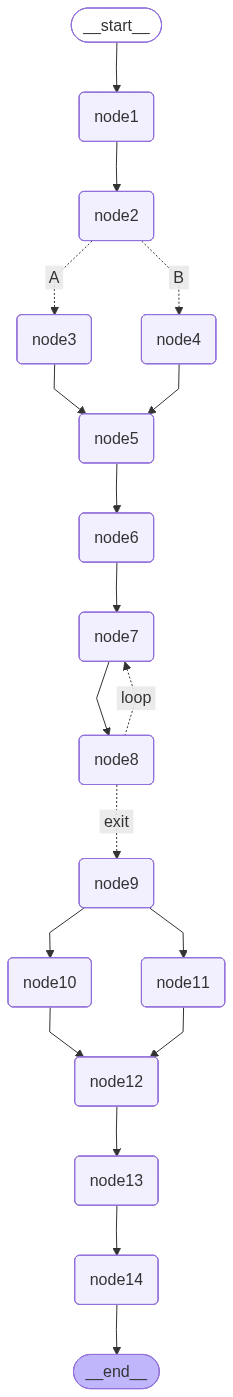

In [11]:
from IPython.display import Image, display
display(Image(workflow.get_graph().draw_mermaid_png()))

In [12]:
# Run workflow
initial_state = {"step": 5, "branch": "node4"}
final_state = workflow.invoke(initial_state)

print("Workflow finished with state:", final_state)

Node 1: Start workflow
Node 2: Checking condition for branching
Node 3B: Branch B
Node 4: Merge after branch
Node 5: Start loop preparation
Node 6: Loop iteration 10
Node 7: Loop exit condition check
Node 8: After loop
Node 9: Parallel task 1
Node 10: Parallel task 2
Node 11: Join after parallel tasks
Node 12: Pre-final
Node 13: Final step
Workflow finished with state: {'step': 17, 'branch': 'A'}


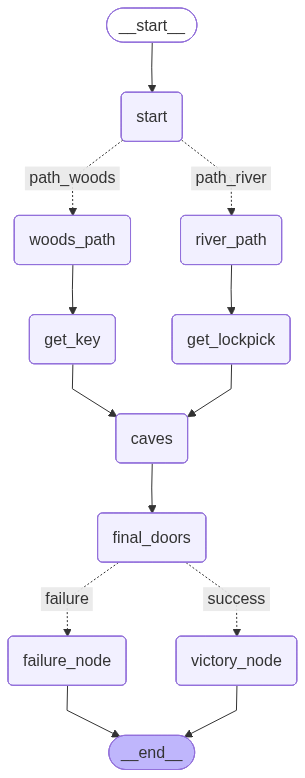

In [13]:
import operator
from typing import TypedDict, List

from langgraph.graph import StateGraph, END

# --- 1. Define the State ---
# This is the "memory" of our graph. It's a dictionary that gets passed between nodes.
class AdventureState(TypedDict):
    """
    Represents the state of our adventure.

    Attributes:
        tool: The tool chosen by the adventurer ('map' or 'compass').
        has_key: Boolean indicating if the adventurer found the key.
        has_lockpick: Boolean indicating if the adventurer found the lockpick.
        final_choice: The final door choice ('stone' or 'wooden').
        adventure_log: A list of strings to track the journey.
    """
    tool: str
    has_key: bool
    has_lockpick: bool
    final_choice: str
    adventure_log: List[str]


# --- 2. Define the Nodes (The Functions) ---
# Each node is a step in our adventure. It takes the current state,
# does something (like printing a message), and returns an updated state.

def start_adventure(state: AdventureState) -> AdventureState:
    print(" adventurer starts their quest! 🗺️")
    log = state['adventure_log'] + ["Our hero stands at the village crossroads."]
    return {"adventure_log": log}

def choose_path_woods(state: AdventureState) -> AdventureState:
    print(" adventurer takes the map and enters the Whispering Woods...")
    log = state['adventure_log'] + ["Walked through the spooky Whispering Woods."]
    return {"adventure_log": log}

def find_key(state: AdventureState) -> AdventureState:
    print("✨ Inside a hollow log, a shiny Key is found!")
    log = state['adventure_log'] + ["Found a mysterious key."]
    return {"adventure_log": log, "has_key": True}

def choose_path_river(state: AdventureState) -> AdventureState:
    print(" adventurer takes the compass and heads to the Rushing River...")
    log = state['adventure_log'] + ["Crossed the wide Rushing River."]
    return {"adventure_log": log}

def find_lockpick(state: AdventureState) -> AdventureState:
    print("🔧 Half-buried in the sand, they find a rusty Lockpick!")
    log = state['adventure_log'] + ["Found a rusty lockpick."]
    return {"adventure_log": log, "has_lockpick": True}
    
def arrive_at_caves(state: AdventureState) -> AdventureState:
    print("\n-- Both paths lead to the entrance of the Crystal Caves! --")
    log = state['adventure_log'] + ["Arrived at the Crystal Caves."]
    return {"adventure_log": log}

def open_door(state: AdventureState) -> AdventureState:
    print(" adventurer approaches the two doors to make a final choice...")
    log = state['adventure_log'] + ["Faced the final two doors."]
    return {"adventure_log": log}

def victory(state: AdventureState) -> AdventureState:
    print("\n🎉 The door creaks open... revealing the magnificent Golden Croissant! Quest complete!")
    log = state['adventure_log'] + ["SUCCESS! Found the Golden Croissant."]
    return {"adventure_log": log}

def failure(state: AdventureState) -> AdventureState:
    print("\n😭 The tool doesn't work on this door! The chance is lost. Quest failed.")
    log = state['adventure_log'] + ["FAILURE! The tool didn't work."]
    return {"adventure_log": log}

# --- 3. Define the Conditional Edges (The Logic) ---
# These functions don't change the state. They just look at it and decide which node to go to next.

def should_take_path(state: AdventureState) -> str:
    """
    Checks the initial tool choice to decide the first path.
    """
    print(f"[Decision Point: Tool is '{state['tool']}']")
    if state['tool'] == 'map':
        return 'path_woods'
    else:
        return 'path_river'

def should_open_door(state: AdventureState) -> str:
    """
    Checks if the adventurer has the right tool for the chosen door.
    """
    print(f"[Decision Point: Trying to open '{state['final_choice']}' door]")
    
    has_key = state.get('has_key', False)
    has_lockpick = state.get('has_lockpick', False)
    final_choice = state['final_choice']

    if final_choice == 'stone' and has_key:
        return 'success'
    elif final_choice == 'wooden' and has_lockpick:
        return 'success'
    else:
        return 'failure'

# --- 4. Build the Graph ---

# Initialize the workflow
workflow = StateGraph(AdventureState)

# Add the nodes
workflow.add_node("start", start_adventure)
workflow.add_node("woods_path", choose_path_woods)
workflow.add_node("get_key", find_key)
workflow.add_node("river_path", choose_path_river)
workflow.add_node("get_lockpick", find_lockpick)
workflow.add_node("caves", arrive_at_caves)
workflow.add_node("final_doors", open_door)
workflow.add_node("victory_node", victory)
workflow.add_node("failure_node", failure)

# Set the entry point
workflow.set_entry_point("start")

# Add the standard edges (A always goes to B)
workflow.add_edge('woods_path', 'get_key')
workflow.add_edge('get_key', 'caves')

workflow.add_edge('river_path', 'get_lockpick')
workflow.add_edge('get_lockpick', 'caves')

workflow.add_edge('caves', 'final_doors')

# Add the conditional edges (branching logic)
workflow.add_conditional_edges(
    "start", # The source node
    should_take_path, # The function that decides
    {
        "path_woods": "woods_path", # If function returns 'path_woods', go to 'woods_path' node
        "path_river": "river_path", # If function returns 'path_river', go to 'river_path' node
    }
)

workflow.add_conditional_edges(
    "final_doors",
    should_open_door,
    {
        "success": "victory_node",
        "failure": "failure_node"
    }
)

# Add the end points
workflow.add_edge('victory_node', END)
workflow.add_edge('failure_node', END)

# Compile the graph into a runnable app
app = workflow.compile()

# Visualize the graph (requires some extra libraries)
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))


In [14]:

# --- 5. Run the Workflow! ---

print("--- SCENARIO 1: The Wise Cartographer (Map -> Stone Door) ---")
# This should be a success!
inputs_1 = {
    "tool": "map",
    "final_choice": "stone",
    "adventure_log": [],
    "has_key": False,
    "has_lockpick": False
}
result_1 = app.invoke(inputs_1)
print("\nFinal Adventure Log:")
print(" -> " + "\n -> ".join(result_1['adventure_log']))
print("-" * 50)

--- SCENARIO 1: The Wise Cartographer (Map -> Stone Door) ---
 adventurer starts their quest! 🗺️
[Decision Point: Tool is 'map']
 adventurer takes the map and enters the Whispering Woods...
✨ Inside a hollow log, a shiny Key is found!

-- Both paths lead to the entrance of the Crystal Caves! --
 adventurer approaches the two doors to make a final choice...
[Decision Point: Trying to open 'stone' door]

🎉 The door creaks open... revealing the magnificent Golden Croissant! Quest complete!

Final Adventure Log:
 -> Our hero stands at the village crossroads.
 -> Walked through the spooky Whispering Woods.
 -> Found a mysterious key.
 -> Arrived at the Crystal Caves.
 -> Faced the final two doors.
 -> SUCCESS! Found the Golden Croissant.
--------------------------------------------------


In [15]:
print("\n--- SCENARIO 2: The Bold Navigator (Compass -> Stone Door) ---")
# This should be a failure!
inputs_2 = {
    "tool": "compass",
    "final_choice": "stone",
    "adventure_log": [],
    "has_key": False,
    "has_lockpick": False
}
result_2 = app.invoke(inputs_2)
print("\nFinal Adventure Log:")
print(" -> " + "\n -> ".join(result_2['adventure_log']))
print("-" * 50)


--- SCENARIO 2: The Bold Navigator (Compass -> Stone Door) ---
 adventurer starts their quest! 🗺️
[Decision Point: Tool is 'compass']
 adventurer takes the compass and heads to the Rushing River...
🔧 Half-buried in the sand, they find a rusty Lockpick!

-- Both paths lead to the entrance of the Crystal Caves! --
 adventurer approaches the two doors to make a final choice...
[Decision Point: Trying to open 'stone' door]

😭 The tool doesn't work on this door! The chance is lost. Quest failed.

Final Adventure Log:
 -> Our hero stands at the village crossroads.
 -> Crossed the wide Rushing River.
 -> Found a rusty lockpick.
 -> Arrived at the Crystal Caves.
 -> Faced the final two doors.
 -> FAILURE! The tool didn't work.
--------------------------------------------------


In [16]:
import random
from typing import TypedDict, List, Optional, Literal
from langgraph.graph import StateGraph, END

# --- 1. State Definition ---
class AIState(TypedDict):
    time: int
    energy: int
    tasks_completed: List[str]
    system_anomalies: List[str]
    mood: Literal['stable', 'curious', 'frustrated', 'creative']
    new_priority_order: Optional[str]
    reboot_in_progress: bool
    creative_idea_log: List[str]

# --- 2. Nodes ---
def start_day(state: AIState) -> AIState:
    print("🌅 (0:00) - AI Core Online. Initializing daily protocols.")
    return {
        "time": 0,
        "energy": 100,
        "tasks_completed": [],
        "system_anomalies": [],
        "mood": 'stable',
        "new_priority_order": None,
        "reboot_in_progress": False
    }

def execute_production_tasks(state: AIState) -> AIState:
    print(f"🔩 ({state.get('time',0)}:00) - Executing standard production tasks.")
    newly_completed = [f"Task_{random.randint(100, 999)}"]
    energy_cost = random.randint(5, 10)
    new_order = None
    if random.random() < 0.15:
        new_order = f"PRIORITY_ORDER_{random.randint(1000, 9999)}"
        print(f"📬 NEW HIGH-PRIORITY ORDER RECEIVED: {new_order}")
    return {
        "time": state.get('time',0) + 1,
        "energy": state.get('energy',100) - energy_cost,
        "tasks_completed": state.get('tasks_completed',[]) + newly_completed,
        "new_priority_order": new_order
    }

def run_diagnostics(state: AIState) -> AIState:
    print(f"🩺 ({state.get('time',0)}:00) - Running system diagnostics.")
    if random.random() < 0.2:
        anomaly = f"ANOMALY_{random.randint(100,999)} at Module {chr(random.randint(65,90))}"
        print(f"🚨 ANOMALY DETECTED: {anomaly}")
        return {
            "time": state.get('time',0) + 1,
            "energy": state.get('energy',100) - 5,
            "system_anomalies": state.get('system_anomalies',[]) + [anomaly],
            "mood": 'frustrated'
        }
    print("✅ System health is nominal.")
    return {"time": state.get('time',0)+1, "energy": state.get('energy',100)-5}

def handle_anomaly(state: AIState) -> AIState:
    anomaly_to_fix = state.get('system_anomalies',["UNKNOWN"])[-1]
    print(f"🛠️ ({state.get('time',0)}:00) - Attempting to resolve anomaly: {anomaly_to_fix}")
    energy_cost = random.randint(15,25)
    return {"time": state.get('time',0)+1, "energy": state.get('energy',100)-energy_cost}

def recharge(state: AIState) -> AIState:
    print(f"⚡ ({state.get('time',0)}:00) - Energy critical. Recharging...")
    recharge_time = 3
    return {"time": state.get('time',0)+recharge_time, "energy": 100, "mood": 'stable'}

def ingest_new_order(state: AIState) -> AIState:
    order = state.get('new_priority_order')
    print(f"📥 ({state.get('time',0)}:00) - Processing high-priority order: {order}")
    return {
        "time": state.get('time',0)+1,
        "energy": state.get('energy',100)-10,
        "tasks_completed": state.get('tasks_completed',[]) + [f"Processed_{order}"],
        "new_priority_order": None,
        "mood": 'curious'
    }

def creative_synthesis(state: AIState) -> AIState:
    print(f"💡 ({state.get('time',0)}:00) - Mood is 'curious'. Initiating creative synthesis.")
    idea = f"IDEA_{random.randint(100,999)}: Optimize routing via pneumatic tubes."
    print(f"✨ New Idea Generated: {idea}")
    return {
        "time": state.get('time',0)+2,
        "energy": state.get('energy',100)-20,
        "creative_idea_log": state.get('creative_idea_log',[]) + [idea],
        "mood": 'creative'
    }

def escalate_and_reboot(state: AIState) -> AIState:
    print(f"💥 ({state.get('time',0)}:00) - CRITICAL FAILURE. Rebooting...")
    return {"reboot_in_progress": True}

def end_of_day_standby(state: AIState) -> AIState:
    print(f"🌙 ({state.get('time',0)}:00) - End of shift. Entering standby mode.")
    return state

# --- 3. Conditional Routers ---
def conditional_entry(state: AIState) -> str:
    if state.get("reboot_in_progress"):
        print("SYSTEM: Booting in recovery mode.")
        return "run_diagnostics"
    else:
        print("SYSTEM: Clean boot. Starting new day.")
        return "start_day"

def master_router(state: AIState) -> str:
    print("...Master Router analyzing state...")
    if state.get('energy',100) < 20:
        return "recharge"
    if state.get('system_anomalies') and state.get('mood')=='frustrated':
        return "handle_anomaly"
    if state.get('new_priority_order'):
        return "ingest_new_order"
    if state.get('time',0) >=8:
        return "end_of_day_standby"
    if state.get('mood')=='curious' and state.get('energy',100)>60 and random.random()<0.5:
        return "creative_synthesis"
    return "execute_production_tasks"

def post_anomaly_check(state: AIState) -> str:
    if random.random() < 0.5:
        print("✅ Anomaly resolved. Returning to normal operations.")
        if state.get('system_anomalies'):
            state['system_anomalies'].pop()
        state['mood'] = 'stable'
        return "continue"
    else:
        print("❌ Anomaly fix FAILED. Escalating...")
        return "escalate"

# --- 4. Build the Graph ---
workflow = StateGraph(AIState)

# Add nodes
workflow.add_node("start_day", start_day)
workflow.add_node("execute_production_tasks", execute_production_tasks)
workflow.add_node("run_diagnostics", run_diagnostics)
workflow.add_node("handle_anomaly", handle_anomaly)
workflow.add_node("recharge", recharge)
workflow.add_node("ingest_new_order", ingest_new_order)
workflow.add_node("creative_synthesis", creative_synthesis)
workflow.add_node("escalate_and_reboot", escalate_and_reboot)
workflow.add_node("end_of_day_standby", end_of_day_standby)

# Conditional entry
workflow.set_conditional_entry_point(
    conditional_entry,
    {
        "start_day":"start_day",
        "run_diagnostics":"run_diagnostics"
    }
)

# Conditional edges (routing)
for node in ["start_day","recharge","ingest_new_order","creative_synthesis","run_diagnostics"]:
    workflow.add_conditional_edges(
        node,
        master_router,
        {
            "recharge":"recharge",
            "handle_anomaly":"handle_anomaly",
            "ingest_new_order":"ingest_new_order",
            "creative_synthesis":"creative_synthesis",
            "execute_production_tasks":"execute_production_tasks",
            "end_of_day_standby":"end_of_day_standby"
        }
    )

# Post anomaly
workflow.add_conditional_edges(
    "handle_anomaly",
    post_anomaly_check,
    {
        "continue":"execute_production_tasks",
        "escalate":"escalate_and_reboot"
    }
)

# Linear edges
workflow.add_edge("execute_production_tasks", "run_diagnostics")
workflow.add_edge("escalate_and_reboot","end_of_day_standby")
workflow.add_edge("end_of_day_standby", END)

# Compile workflow
app = workflow.compile()


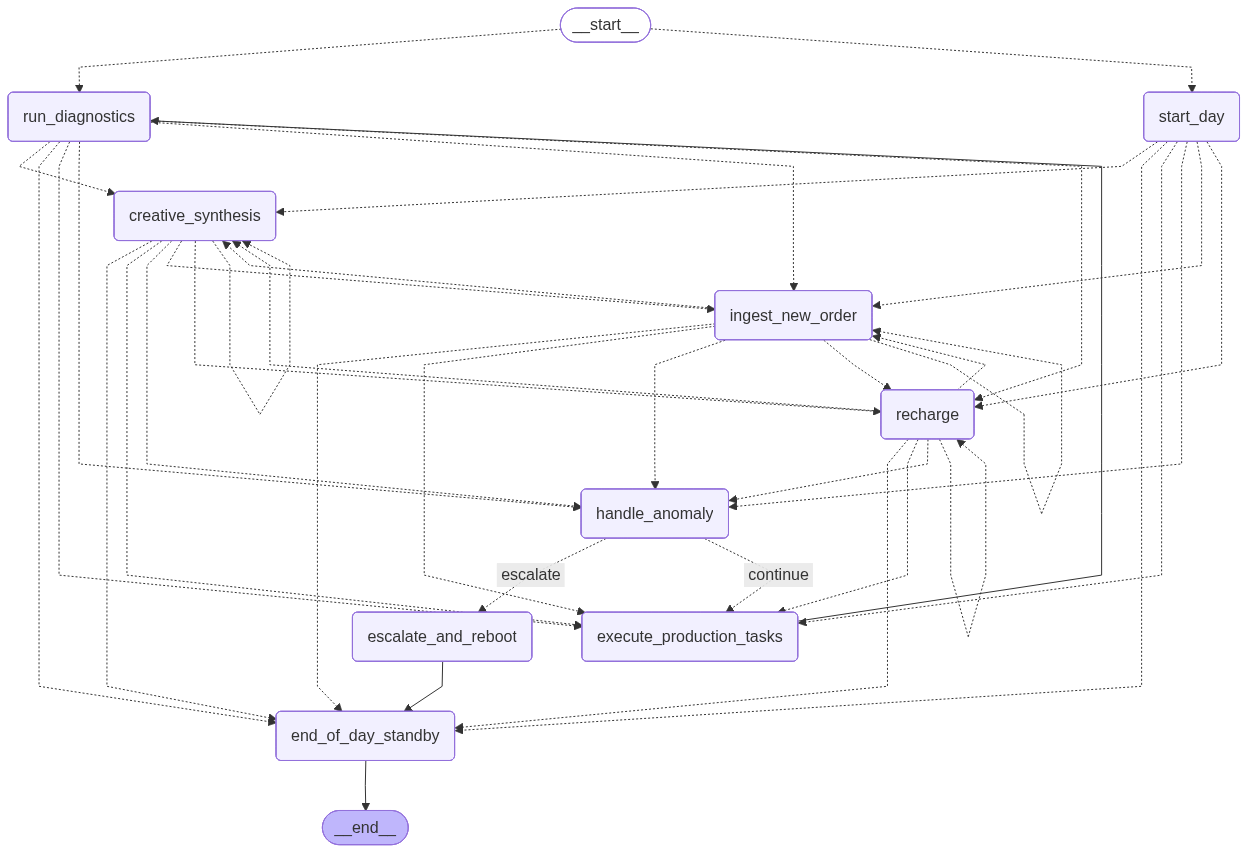

In [17]:
# Visualize the graph (requires some extra libraries)
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [18]:

# --- 5. Run Simulation ---
print("\n--- SIMULATION START ---")
initial_state = {"reboot_in_progress": False, "creative_idea_log": []}

for i in range(20):  # simulate 20 steps
    print(f"\n--- STEP {i+1} ---")
    outputs = app.invoke(initial_state)
    initial_state = outputs
    if initial_state.get('time',0) >= 8:
        print("\n--- DAY COMPLETE ---")
        initial_state["reboot_in_progress"] = False



--- SIMULATION START ---

--- STEP 1 ---
SYSTEM: Clean boot. Starting new day.
🌅 (0:00) - AI Core Online. Initializing daily protocols.
...Master Router analyzing state...
🔩 (0:00) - Executing standard production tasks.
🩺 (1:00) - Running system diagnostics.
✅ System health is nominal.
...Master Router analyzing state...
🔩 (2:00) - Executing standard production tasks.
🩺 (3:00) - Running system diagnostics.
🚨 ANOMALY DETECTED: ANOMALY_962 at Module K
...Master Router analyzing state...
🛠️ (4:00) - Attempting to resolve anomaly: ANOMALY_962 at Module K
✅ Anomaly resolved. Returning to normal operations.
🔩 (5:00) - Executing standard production tasks.
🩺 (6:00) - Running system diagnostics.
✅ System health is nominal.
...Master Router analyzing state...
🔩 (7:00) - Executing standard production tasks.
🩺 (8:00) - Running system diagnostics.
✅ System health is nominal.
...Master Router analyzing state...
🌙 (9:00) - End of shift. Entering standby mode.

--- DAY COMPLETE ---

--- STEP 2 ---
SY